<a href="https://colab.research.google.com/github/Shamil2007/DataAnalysis/blob/main/london_bike_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download hmavrodiev/london-bike-sharing-dataset

Dataset URL: https://www.kaggle.com/datasets/hmavrodiev/london-bike-sharing-dataset
License(s): other
  0% 0.00/165k [00:00<?, ?B/s]
100% 165k/165k [00:00<00:00, 355MB/s]


In [3]:
!unzip/content/london-bike-sharing-dataset.zip

/bin/bash: line 1: unzip/content/london-bike-sharing-dataset.zip: No such file or directory


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
df = pd.read_csv("/content/london-bike-sharing-dataset.zip")
df

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [84]:
df.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


In [85]:
df.isna().sum()

,0
timestamp,0
cnt,0
t1,0
t2,0
hum,0
wind_speed,0
weather_code,0
is_holiday,0
is_weekend,0
season,0


In [86]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [87]:
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['day_of_week'] = df['timestamp'].dt.day_name()
df['hour'] = df['timestamp'].dt.hour

In [88]:
df.drop("timestamp", axis=1, inplace=True)

In [89]:
df.rename(columns={
    "cnt": "count",
    "t1": "real_temp",
    "t2": "feeling_temp",
    "weather_code": "weather"
}, inplace=True)

df.columns

Index(['count', 'real_temp', 'feeling_temp', 'hum', 'wind_speed', 'weather',
       'is_holiday', 'is_weekend', 'season', 'year', 'month', 'day',
       'day_of_week', 'hour'],
      dtype='object')

In [90]:
df_analysis = df.copy()

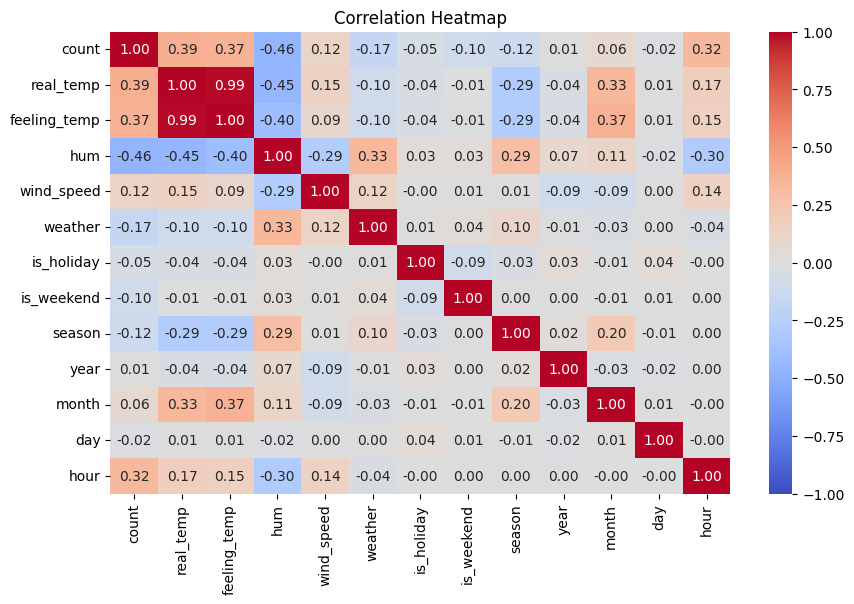

In [91]:
correlation = df_analysis.select_dtypes(include="number").corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

In [92]:
df_analysis["weather"].value_counts()

,count
weather,
1.0,6150
2.0,4034
3.0,3551
7.0,2141
4.0,1464
26.0,60
10.0,14


In [93]:
weather_map = {
    1.0: "Clear",
    2.0: "Few Clouds",
    3.0: "Broken Clouds",
    4.0: "Cloudy",
    7.0: "Rain",
    10.0: "Rain with Thunderstorm",
    26.0: "Snowfall",
    94.0: "Freezing Fog"
}

df_analysis["weather"] = df_analysis["weather"].map(weather_map)
df_analysis['weather'].head(10)

,weather
0,Broken Clouds
1,Clear
2,Clear
3,Clear
4,Clear
5,Clear
6,Cloudy
7,Cloudy
8,Cloudy
9,Broken Clouds


In [94]:
df_analysis.loc[:, "is_weekend"] = df_analysis['is_weekend'].map(lambda x: "WeekEnd" if x == 1.0 else "WeekDays").astype(str)

/tmp/ipython-input-2315433993.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['WeekEnd' 'WeekEnd' 'WeekEnd' ... 'WeekDays' 'WeekDays' 'WeekDays']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_analysis.loc[:, "is_weekend"] = df_analysis['is_weekend'].map(lambda x: "WeekEnd" if x == 1.0 else "WeekDays").astype(str)


In [95]:
df_analysis.loc[:, "is_holiday"] = df_analysis['is_holiday'].map(lambda x: "Holiday" if x == 1.0 else "Non-Holiday").astype(str)

/tmp/ipython-input-1629825884.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Non-Holiday' 'Non-Holiday' 'Non-Holiday' ... 'Non-Holiday' 'Non-Holiday'
 'Non-Holiday']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_analysis.loc[:, "is_holiday"] = df_analysis['is_holiday'].map(lambda x: "Holiday" if x == 1.0 else "Non-Holiday").astype(str)


# Which year is most new bike shared?

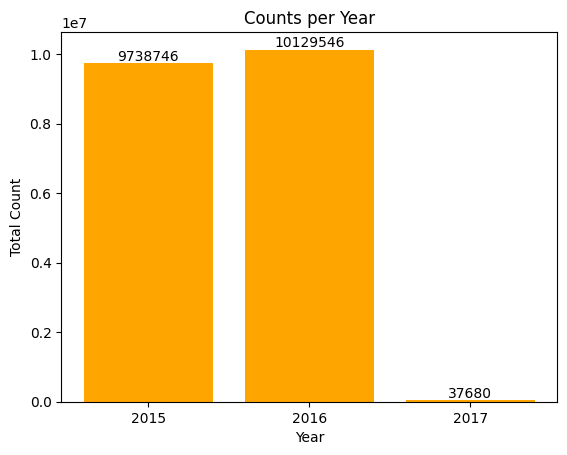

In [65]:
year_count = df_analysis.groupby("year")['count'].sum()

bars = plt.bar([str(y) for y in year_count.index], year_count.values, color='orange')
plt.xlabel("Year")
plt.ylabel("Total Count")
plt.title("Counts per Year")

plt.bar_label(bars, fmt='%.0f')

plt.show()

Bike shares in 2015 and 2016 are approximately 10 million each, whereas in 2017 the figure drops drastically to around 40,000. This sharp decrease warrants further investigation to identify potential data issues or changes in reporting methods.

In [66]:
df_analysis[df['year'] == 2015][['month', "day"]].min()

,0
month,1
day,1


In [67]:
df_analysis[df['year'] == 2017][['month', "day"]].max()

,0
month,1
day,3


The statistics indicate that in 2017, bike shares were recorded for only the first three days, up to January 3rd. Consequently, the total count is significantly lower compared to previous years, which explains the drastic drop in the data.

In [68]:
df_analysis = df_analysis[df_analysis['year'] != 2017].copy()

It would be advisable to remove the 2017 data, as it only covers the first three days of the year. Including these incomplete records could distort the analysis and lead to misleading conclusions.

#Which months play more role in sales?

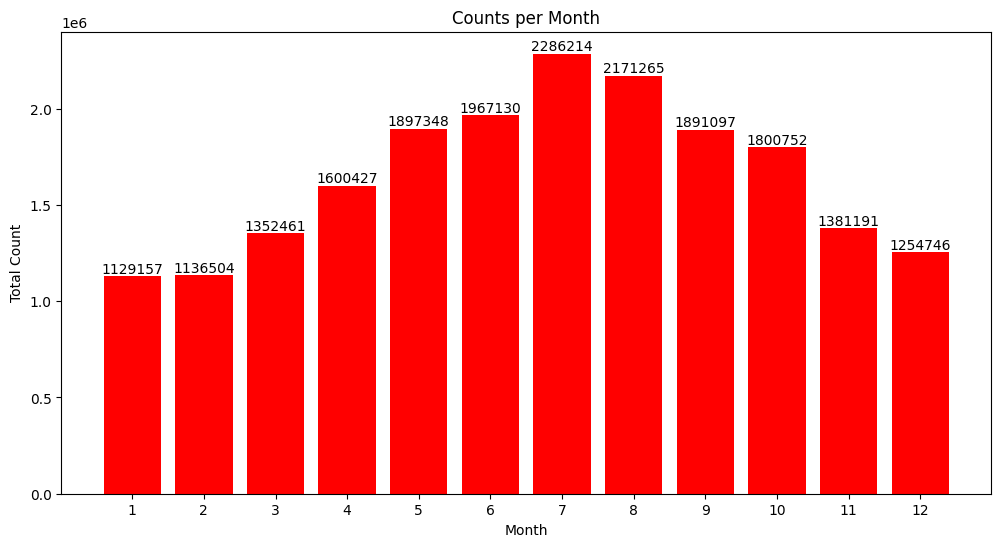

In [69]:
month_count = df_analysis.groupby("month")['count'].sum()

plt.figure(figsize=(12, 6))
bars = plt.bar([str(y) for y in month_count.index], month_count.values, color='red')
plt.xlabel("Month")
plt.ylabel("Total Count")
plt.title("Counts per Month")

plt.bar_label(bars, fmt='%.0f')

plt.show()

In [70]:
month_count.sort_values(ascending=False).head(3)

,count
month,
7,2286214
8,2171265
6,1967130


In [71]:
month_count.sort_values(ascending=True).head(3)

,count
month,
1,1129157
2,1136504
12,1254746


The data show that the highest sales occur during the summer months (June, July, and August), with overall strong performance from May to October. In contrast, sales decline significantly during the winter months, particularly in December, January, and February.

# Let's also see how seasons affect sales

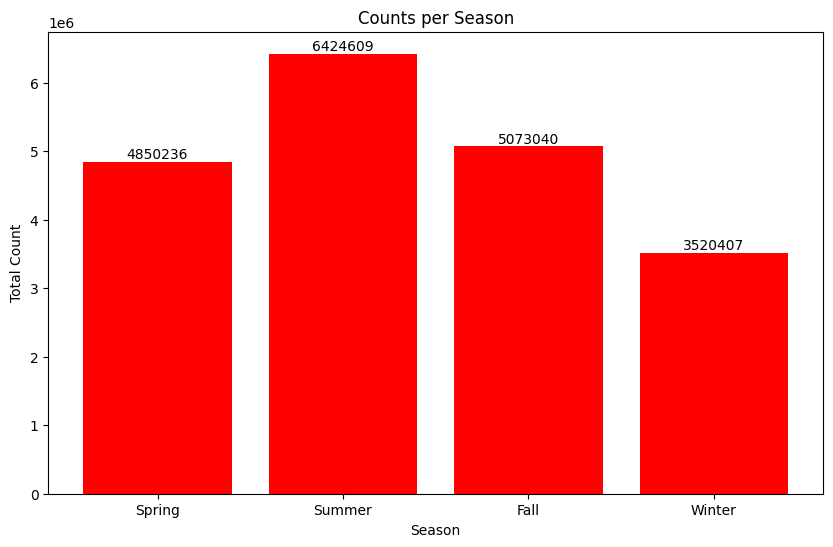

In [72]:
month_count = df_analysis.groupby("season")['count'].sum()

labels = {
    0: "Spring",
    1: "Summer",
    2: "Fall",
    3: "Winter"
}
season_names = month_count.index.map(labels)

plt.figure(figsize=(10, 6))
bars = plt.bar(season_names, month_count.values, color='red')

plt.xlabel("Season")
plt.ylabel("Total Count")
plt.title("Counts per Season")
plt.bar_label(bars, fmt='%.0f')
plt.show()

As expected, bike sales are higher in the summer months than in winter. This trend is likely driven by warmer weather, longer daylight hours, and increased outdoor activities, which encourage more cycling. Conversely, winter months see lower sales due to colder temperatures, shorter days, and less favorable conditions for biking.

#Is the day of the week influences sales during the summer months

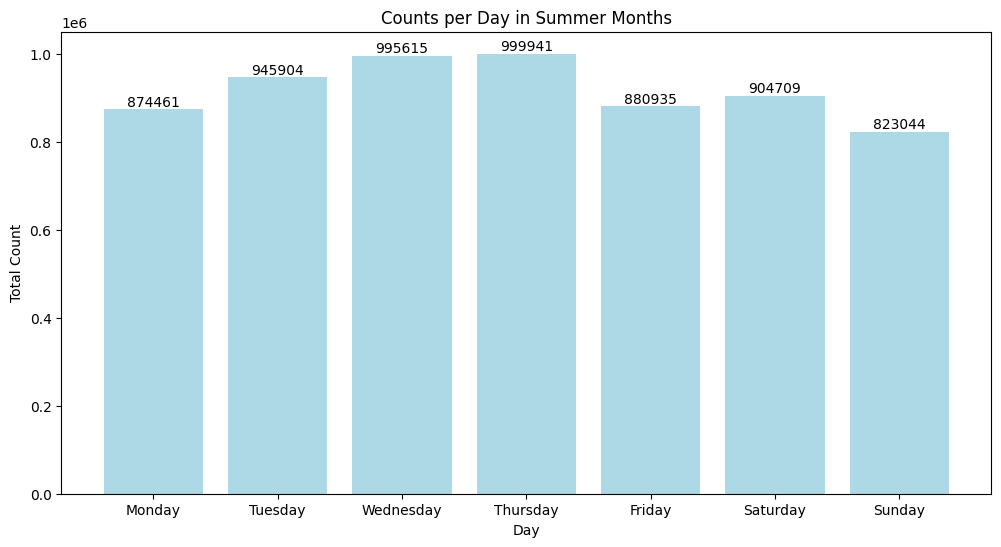

In [73]:
summer_months = df_analysis[df_analysis['month'].isin([6, 7, 8])]
day_of_week_sales_summer = summer_months.groupby("day_of_week")['count'].sum()

week_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

day_of_week_sales_summer = day_of_week_sales_summer.reindex(week_order, fill_value=0)

plt.figure(figsize=(12, 6))
bars = plt.bar(day_of_week_sales_summer.index, day_of_week_sales_summer.values, color='lightblue')
plt.xlabel("Day")
plt.ylabel("Total Count")
plt.title("Counts per Day in Summer Months")
plt.bar_label(bars, fmt='%.0f')
plt.show()

The analysis shows that sales are relatively consistent across the days of the week during summer. However, Wednesday and Thursday stand out slightly as the days with the highest sales.

# How does the hour affect sales?

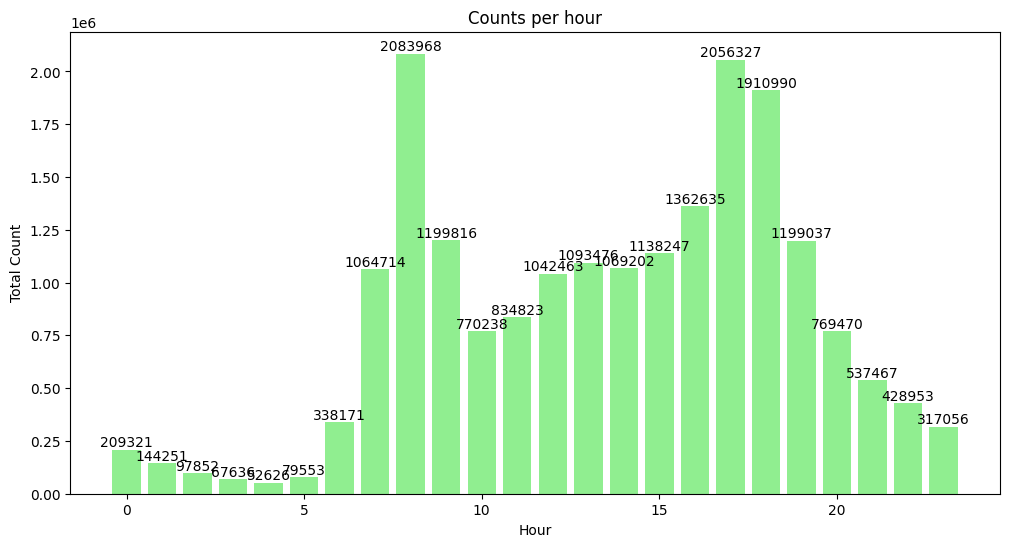

In [74]:
hours_count = df_analysis.groupby("hour")["count"].sum()

plt.figure(figsize=(12, 6))
bars = plt.bar(hours_count.index, hours_count.values, color='lightgreen')
plt.xlabel("Hour")
plt.ylabel("Total Count")
plt.title("Counts per hour")
plt.bar_label(bars, fmt='%.0f')
plt.show()

The hourly sales distribution highlights two clear peaks: one at 8 AM, likely due to customers grabbing coffee on their way to work or university, and another between 5–6 PM, after the workday or study sessions end.

Sales remain low during the early morning hours (12 AM–8 AM), when most people are asleep. From 9 AM to 3 PM, sales stay steady but moderate, as people are busy with work or study.

Toward the evening and night, sales decline again, likely due to fatigue or reduced coffee consumption late in the day.

#Do sales average vary for weekdays or weekends?

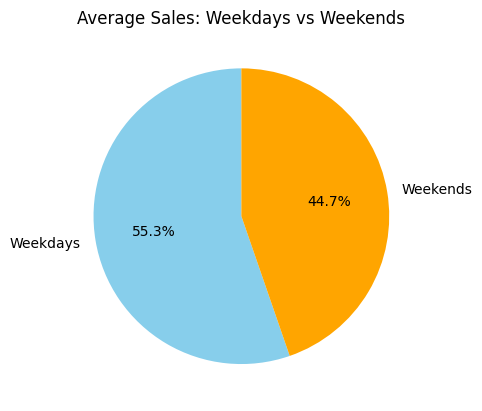

In [75]:
avg_sales = df.groupby("is_weekend")["count"].mean()

labels = ["Weekdays", "Weekends"] if 0 in avg_sales.index else ["Weekends", "Weekdays"]

plt.pie(avg_sales, labels=labels, autopct="%.1f%%", startangle=90, colors=["skyblue", "orange"])
plt.title("Average Sales: Weekdays vs Weekends")
plt.show()

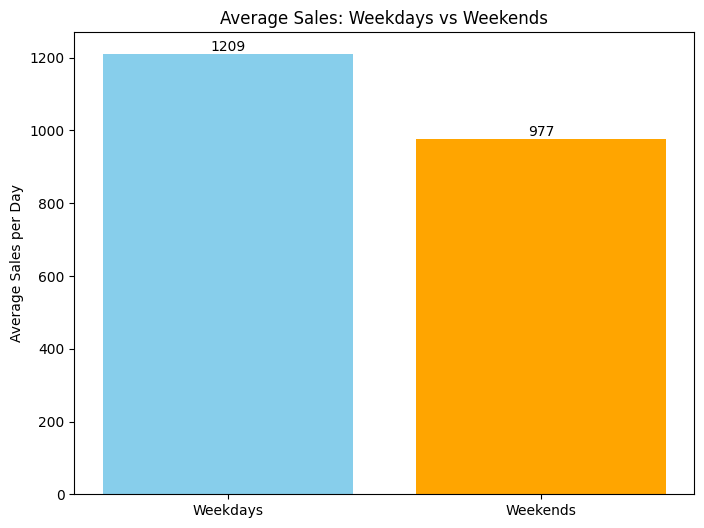

In [76]:
avg_sales.index = avg_sales.index.map({0: "Weekdays", 1: "Weekends"})

plt.figure(figsize=(8,6))
bars = plt.bar(avg_sales.index, avg_sales.values, color=["skyblue", "orange"])

plt.ylabel("Average Sales per Day")
plt.title("Average Sales: Weekdays vs Weekends")

plt.bar_label(bars, fmt="%.0f")
plt.show()

# Do sales vary by hour for weekdays or weekends?

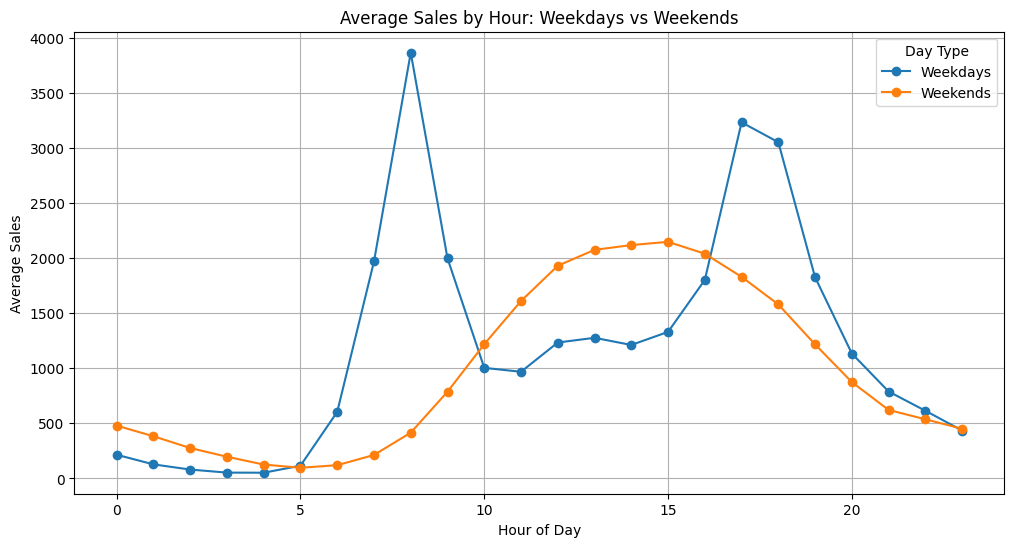

In [77]:
sales_by_hour = df.groupby(["is_weekend", "hour"])["count"].mean().reset_index()

sales_by_hour["is_weekend"] = sales_by_hour["is_weekend"].map({0: "Weekdays", 1: "Weekends"})

plt.figure(figsize=(12,6))
for label, group in sales_by_hour.groupby("is_weekend"):
    plt.plot(group["hour"], group["count"], marker="o", label=label)

plt.xlabel("Hour of Day")
plt.ylabel("Average Sales")
plt.title("Average Sales by Hour: Weekdays vs Weekends")
plt.legend(title="Day Type")
plt.grid(True)
plt.show()

As analyzed earlier, peak sales hours on weekdays align with commuting times—early morning (going to work) and late afternoon (returning home). In contrast, weekends show a different pattern: sales are higher in the middle of the day, as people stay at home, relax, or engage in leisure activities such as cycling.

# Does the holiday affect sales?

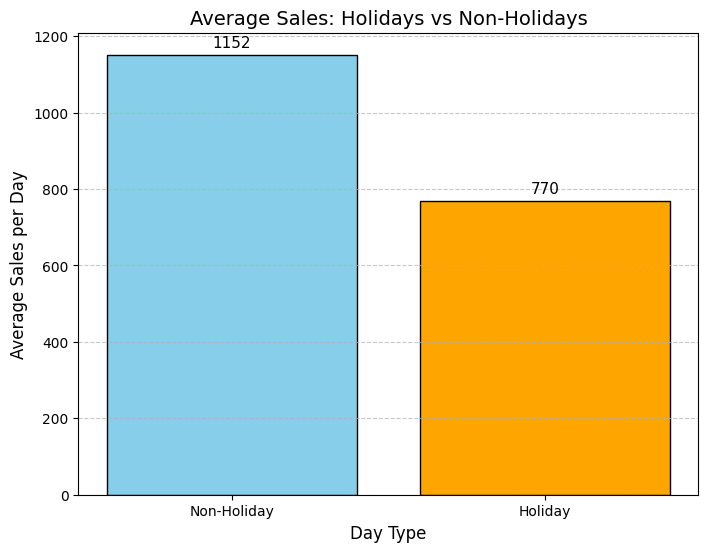

In [78]:
holiday_sales = df.groupby("is_holiday")['count'].mean()

holiday_sales.index = holiday_sales.index.map({0: "Non-Holiday", 1: "Holiday"})

plt.figure(figsize=(8, 6))
bars = plt.bar(holiday_sales.index, holiday_sales.values, color=["skyblue", "orange"], edgecolor="black")

plt.xlabel("Day Type", fontsize=12)
plt.ylabel("Average Sales per Day", fontsize=12)
plt.title("Average Sales: Holidays vs Non-Holidays", fontsize=14)
plt.bar_label(bars, fmt="%.0f", fontsize=11, padding=3)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Analyzing the average sales, non-holiday days record a mean of 1,150 units, while holidays average 770 units. This indicates that sales on non-holidays are approximately 1.5 times higher than on holidays.

#Does Weather Fluctuation Affect Sales?

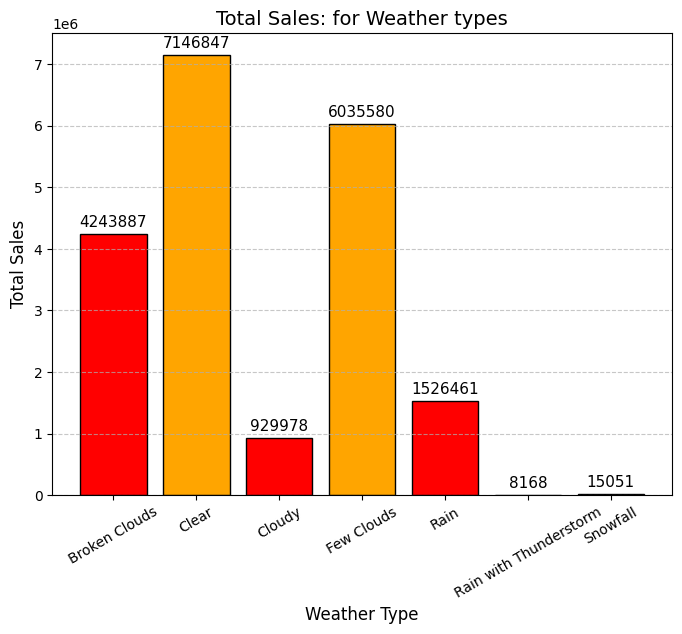

In [98]:
weather_counts = df_analysis.groupby("weather")['count'].sum()

plt.figure(figsize=(8, 6))
bars = plt.bar(weather_counts.index, weather_counts.values, color=["red", "orange"], edgecolor="black")

plt.xlabel("Weather Type", fontsize=12)
plt.xticks(rotation=30)
plt.ylabel("Total Sales", fontsize=12)
plt.title("Total Sales: for Weather types", fontsize=14)
plt.bar_label(bars, fmt="%.0f", fontsize=11, padding=3)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Evaluating total sales by weather conditions is not entirely accurate, as most days are categorized as 'clear' or 'few clouds.' This imbalance skews the results. A better approach is to compare mean sales across different weather types to get a fairer picture.

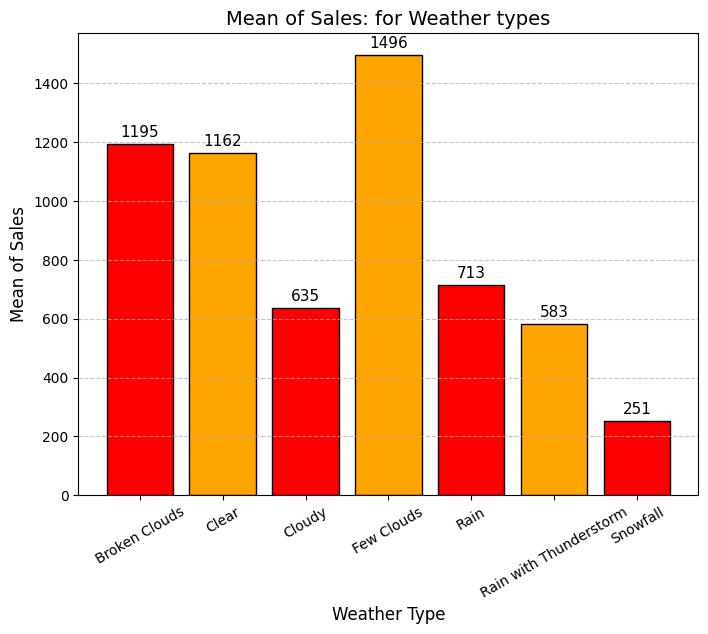

In [99]:
weather_counts = df_analysis.groupby("weather")['count'].mean()

plt.figure(figsize=(8, 6))
bars = plt.bar(weather_counts.index, weather_counts.values, color=["red", "orange"], edgecolor="black")

plt.xlabel("Weather Type", fontsize=12)
plt.xticks(rotation=30)
plt.ylabel("Mean of Sales", fontsize=12)
plt.title("Mean of Sales: for Weather types", fontsize=14)
plt.bar_label(bars, fmt="%.0f", fontsize=11, padding=3)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The chart indicates that sales are higher during weather conditions such as broken clouds, clear skies, and few clouds. This may be due to favorable outdoor conditions that encourage cycling or visiting stores. In contrast, weather conditions such as rain or snowfall correspond to significantly lower sales, likely because unfavorable conditions discourage outdoor activities.

#Does wind speed effect on Sales?

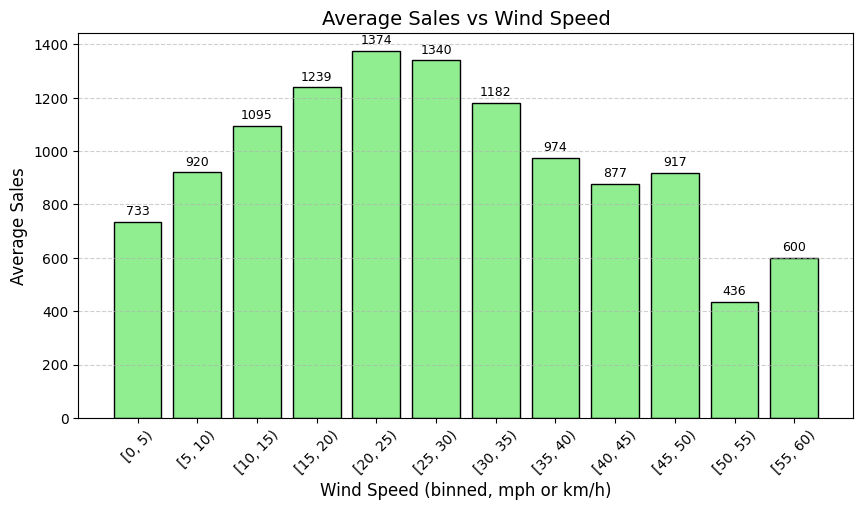

In [115]:
wind_speed_bins = [i for i in range(0, 65, 5)]

df['wind_speed_bin'] = pd.cut(df['wind_speed'], bins=wind_speed_bins, right=False)

windSpeed_counts = df.groupby('wind_speed_bin', observed=False)['count'].mean()

plt.figure(figsize=(10, 5))
bars = plt.bar(windSpeed_counts.index.astype(str), windSpeed_counts.values, color="lightgreen", edgecolor="black")

plt.xticks(rotation=45)
plt.xlabel("Wind Speed (binned, mph or km/h)", fontsize=12)
plt.ylabel("Average Sales", fontsize=12)
plt.title("Average Sales vs Wind Speed", fontsize=14)

plt.bar_label(bars, fmt="%.0f", fontsize=9, padding=3)
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.show()

An interesting pattern appears with wind speed: sales are highest when the wind is in the 20–30 range, but when wind speeds are very low, sales drop. Moderate winds might reflect pleasant outdoor conditions, while very calm weather doesn’t have the same effect.